Model Balanced Final Script - SMOTE Method Used

SMOTE

In [3]:
#dataframe manipulation
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

In [4]:
df=pd.read_excel("CleanData.xlsx")
df.head(3)

,Age,GDP,DelayInReporting,AccidentArea_Urban,Sex_Male,Fault_Third Party,BasePolicy_Collision,BasePolicy_Liability,VehicleCategory_Sport,VehicleCategory_Utility,PastNumberOfClaims_2 to 4,PastNumberOfClaims_more than 4,PastNumberOfClaims_none,PoliceReportFiled_Yes,WitnessPresent_Yes,FraudFound_P
0,21,7455,31,1,0,0,0,1,1,0,0,0,1,0,0,0
1,34,7115,0,1,1,0,1,0,1,0,0,0,1,1,0,0
2,47,7455,31,1,1,0,1,0,1,0,0,0,0,0,0,0


In [5]:
print(df.shape)

(15420, 16)


In [6]:
df.dtypes

Age                               int64
GDP                               int64
DelayInReporting                  int64
AccidentArea_Urban                int64
Sex_Male                          int64
Fault_Third Party                 int64
BasePolicy_Collision              int64
BasePolicy_Liability              int64
VehicleCategory_Sport             int64
VehicleCategory_Utility           int64
PastNumberOfClaims_2 to 4         int64
PastNumberOfClaims_more than 4    int64
PastNumberOfClaims_none           int64
PoliceReportFiled_Yes             int64
WitnessPresent_Yes                int64
FraudFound_P                      int64
dtype: object

In [7]:
cols = ['Age', 'GDP', 'DelayInReporting', 'AccidentArea_Urban', 'Sex_Male', 'Fault_Third Party', 'BasePolicy_Collision',
         'BasePolicy_Liability', 'VehicleCategory_Sport', 'VehicleCategory_Utility', 'PastNumberOfClaims_2 to 4',
         'PastNumberOfClaims_more than 4', 'PastNumberOfClaims_none', 'PoliceReportFiled_Yes', 'WitnessPresent_Yes']

In [8]:
#split data into x and y
#also make x into a numpy array so it can be fit onto the model
x =  df[cols].values
x

y = df['FraudFound_P']
y

print(x.shape)
print(y.shape)

(15420, 15)
(15420,)


In [9]:
#hold out validation technique - 70-20-10
#train model on 70, test on 20
from sklearn.model_selection import train_test_split
#test data
x_train, x_test, y_train, y_test =  train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=7, stratify=y)

#after hyperparameter tuning - and after best parameters
x_train, x_valid, y_train, y_valid =  train_test_split(x_train, y_train, train_size=0.9, test_size=0.1, random_state=7)

print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(9714, 15)
(4626, 15)
(1080, 15)
(9714,)
(4626,)
(1080,)


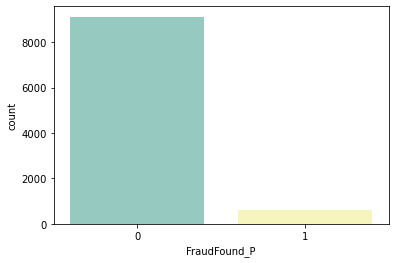

In [10]:
ax =  sns.countplot(x=y_train, palette="Set3")

In [11]:
from imblearn.over_sampling import SMOTE
from collections import Counter


counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 9120, 1: 594})
After Counter({0: 9120, 1: 9120})


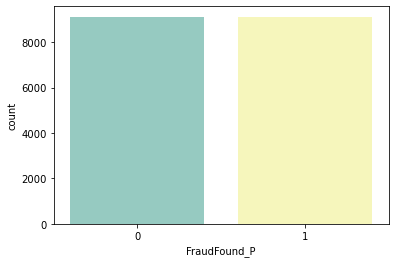

In [12]:
ax =  sns.countplot(x=y_train_sm, palette="Set3")

## Logistic Regression

In [13]:
#Build model
logreg = LogisticRegression(random_state=10, solver='lbfgs', max_iter=10000)
logreg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=10000, random_state=10)

In [14]:
#make predictions
pred_log = logreg.predict(x_test)

#probabilities
pred_proba = logreg.predict_proba(x_test)

logreg.coef_

array([[-2.39351308e-02,  4.14724182e-04, -5.47907781e-03,
        -2.34949882e-01, -1.76530935e-01, -3.99880589e+00,
        -1.41806673e+00, -3.06531375e+00, -2.09165112e+00,
        -1.35729502e+00, -1.38113391e+00, -2.24192121e+00,
        -1.20757256e+00, -9.73256011e-01, -2.10696367e-01]])

In [15]:
#evaluate model
#on training set
print("The training Accuracy is: ", logreg.score(X_train_sm, y_train_sm))

#test the model on unseen data - higher accuracy than training data?
print("The test Accuracy is: ", logreg.score(x_test, y_test))

#classification report
print(classification_report(y_test, pred_log))

#roc_auc
print("AUCROC:",roc_auc_score(y_test, pred_proba[:,1]))

The training Accuracy is:  0.8329495614035087
The test Accuracy is:  0.7812364894076956
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      4349
           1       0.15      0.58      0.24       277

    accuracy                           0.78      4626
   macro avg       0.56      0.69      0.56      4626
weighted avg       0.92      0.78      0.83      4626

AUCROC: 0.7836744909199426


In [16]:
#confusion matrix to show how well the model predicts each class
def plot_confusion_matrix(cm, classes=None, title='Confusion Matrix'):
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

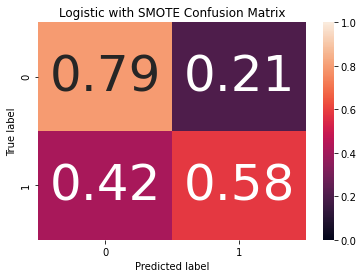

In [17]:
cm = confusion_matrix(y_test, pred_log)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm,classes=logreg.classes_, title='Logistic with SMOTE Confusion Matrix')

In [18]:
#Log Loss - log loss went up for unseen data. shouldnt be better than training data - so makes sense
from sklearn.metrics import log_loss

pred_proba_t = logreg.predict_proba(X_train_sm)
print("The log loss on Training is: ", log_loss(y_train_sm,pred_proba_t))

print("The log loss on Test is: ", log_loss(y_test,pred_proba))

The log loss on Training is:  0.38087287901803046
The log loss on Test is:  0.4153094911402766


Tuning the hyperparameters for logistic model

In [19]:
#regularisation strength - helps to avoid overfitting
#range for c-values
np.geomspace(1e-5, 1e5, num=20)

array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])

In [20]:
c_list = np.geomspace(1e-5, 1e5, num=20)
CA = []
logarithmic_loss =[]

for c in c_list:
    logreg2 = LogisticRegression(random_state=10,C=c)
    logreg2.fit(X_train_sm, y_train_sm)
    score =  logreg2.score(x_test, y_test)
    CA.append(score)
    print("The classification accuracy of c parameter {} is {}".format(c, score))
    pred_proba_t = logreg2.predict_proba(x_test)
    log_loss2 = log_loss(y_test,pred_proba_t)
    logarithmic_loss.append(log_loss2)
    print("The log loss of c parameter {} is {}".format(c, log_loss2))
    print("")

The classification accuracy of c parameter 1e-05 is 0.5140510159965412
The log loss of c parameter 1e-05 is 0.6832234561389502

The classification accuracy of c parameter 3.359818286283781e-05 is 0.5583657587548638
The log loss of c parameter 3.359818286283781e-05 is 0.6736880563949775

The classification accuracy of c parameter 0.00011288378916846884 is 0.6647211413748378
The log loss of c parameter 0.00011288378916846884 is 0.6467922768715072

The classification accuracy of c parameter 0.000379269019073225 is 0.6733679204496326
The log loss of c parameter 0.000379269019073225 is 0.5920571095265371

The classification accuracy of c parameter 0.0012742749857031334 is 0.6876351059230437
The log loss of c parameter 0.0012742749857031334 is 0.5273328503219226

The classification accuracy of c parameter 0.004281332398719391 is 0.7568093385214008
The log loss of c parameter 0.004281332398719391 is 0.4530590897518417

The classification accuracy of c parameter 0.01438449888287663 is 0.768482

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

The classification accuracy of c parameter 0.04832930238571752 is 0.77431906614786
The log loss of c parameter 0.04832930238571752 is 0.4252540395489597

The classification accuracy of c parameter 0.1623776739188721 is 0.7751837440553394
The log loss of c parameter 0.1623776739188721 is 0.4247285836119194

The classification accuracy of c parameter 0.5455594781168515 is 0.7829658452226546
The log loss of c parameter 0.5455594781168515 is 0.41501739947194105

The classification accuracy of c parameter 1.8329807108324339 is 0.7762645914396887
The log loss of c parameter 1.8329807108324339 is 0.4251067573939569



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The classification accuracy of c parameter 6.1584821106602545 is 0.7762645914396887
The log loss of c parameter 6.1584821106602545 is 0.42515643679052684

The classification accuracy of c parameter 20.6913808111479 is 0.7764807609165586
The log loss of c parameter 20.6913808111479 is 0.42503106043611627

The classification accuracy of c parameter 69.51927961775606 is 0.7762645914396887
The log loss of c parameter 69.51927961775606 is 0.42515159133007235



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The classification accuracy of c parameter 233.57214690901213 is 0.7762645914396887
The log loss of c parameter 233.57214690901213 is 0.4251386291147716

The classification accuracy of c parameter 784.7599703514607 is 0.7810203199308258
The log loss of c parameter 784.7599703514607 is 0.41556207620763636

The classification accuracy of c parameter 2636.6508987303555 is 0.7762645914396887
The log loss of c parameter 2636.6508987303555 is 0.42513455222723867



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The classification accuracy of c parameter 8858.667904100832 is 0.7762645914396887
The log loss of c parameter 8858.667904100832 is 0.42516830746999384

The classification accuracy of c parameter 29763.51441631313 is 0.7803718115002162
The log loss of c parameter 29763.51441631313 is 0.41013474737597394

The classification accuracy of c parameter 100000.0 is 0.7762645914396887
The log loss of c parameter 100000.0 is 0.425127138789179



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
CA2 = np.array(CA).reshape(20,)
logarithmic_loss2 = np.array(logarithmic_loss).reshape(20,)

outcomes =  zip(c_list, CA2, logarithmic_loss2)

df_outcomes = pd.DataFrame(outcomes, columns=['C_List', 'CA2', 'LOG LOSS2'])
df_outcomes
df_outcomes.sort_values("LOG LOSS2", ascending=True).reset_index()

,index,C_List,CA2,LOG LOSS2
0,18,29763.514416,0.780372,0.410135
1,9,0.545559,0.782966,0.415017
2,15,784.759970,0.781020,0.415562
3,8,0.162378,0.775184,0.424729
4,12,20.691381,0.776481,0.425031
5,10,1.832981,0.776265,0.425107
6,19,100000.000000,0.776265,0.425127
7,16,2636.650899,0.776265,0.425135
8,14,233.572147,0.776265,0.425139
9,13,69.519280,0.776265,0.425152


c=8 is the optimal as it has the lowest log loss and very close to highest classification accuracy

In [22]:
#run new logistic regression using optimal paramaters
logregnew = LogisticRegression(random_state=10,solver='lbfgs', C=0.162378, max_iter=10000)
logregnew.fit(X_train_sm, y_train_sm)
score =  logregnew.score(x_test, y_test)

pred_proba_tnew = logregnew.predict_proba(x_test)
log_lossnew = log_loss(y_test,pred_proba_tnew)


print("Testing Accuracy:", score) 
print("Log Loss:", log_lossnew)

Testing Accuracy: 0.7792909641158668
Log Loss: 0.4142845486733709


In [23]:
y_pred_new = logregnew.predict(x_test)

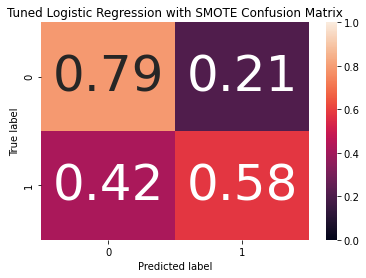

In [24]:
cm = confusion_matrix(y_test, y_pred_new)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
cm_norm
plot_confusion_matrix(cm_norm,classes=logregnew.classes_, title='Tuned Logistic Regression with SMOTE Confusion Matrix')

In [25]:
#evaluate model
#on training set
print("The training Accuracy is: ", logregnew.score(X_train_sm, y_train_sm))

#test the model on unseen data - higher accuracy than training data?
print("The test Accuracy is: ", logregnew.score(x_test, y_test))

#classification report
print(classification_report(y_test, y_pred_new))

#roc_auc
print("AUCROC:",roc_auc_score(y_test, pred_proba[:,1]))

The training Accuracy is:  0.8326206140350877
The test Accuracy is:  0.7792909641158668
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      4349
           1       0.15      0.58      0.24       277

    accuracy                           0.78      4626
   macro avg       0.56      0.69      0.56      4626
weighted avg       0.92      0.78      0.83      4626

AUCROC: 0.7836744909199426


## Random Forest

In [26]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_sm, y_train_sm)

y_pred_rf = rf.predict(X=x_test)

#probabilities
pred_proba_rf = rf.predict_proba(x_test)


In [27]:
#evaluate model
#on training set
print("The training Accuracy is: ", rf.score(X_train_sm, y_train_sm))

#test the model on unseen data - higher accuracy than training data?
print("The test Accuracy is: ", rf.score(x_test, y_test))

#classification report
print(classification_report(y_test, y_pred_rf))

#roc_auc
print("AUCROC:",roc_auc_score(y_test, pred_proba_rf[:,1]))

The training Accuracy is:  0.9765350877192982
The test Accuracy is:  0.8800259403372244
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      4349
           1       0.16      0.24      0.19       277

    accuracy                           0.88      4626
   macro avg       0.56      0.58      0.56      4626
weighted avg       0.90      0.88      0.89      4626

AUCROC: 0.7640816221497453


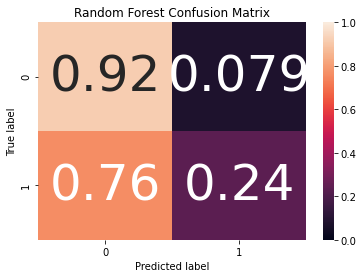

In [28]:
cm = confusion_matrix(y_test, y_pred_rf)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
cm_norm
plot_confusion_matrix(cm_norm,classes=rf.classes_, title='Random Forest Confusion Matrix')

Tune Parameters to find best model

In [29]:
max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,110,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestClassifier()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [30]:
grid.fit(X_train_sm,y_train_sm)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])})

In [31]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'max_features': 4, 'n_estimators': 90} with a score of 0.93


Pass best parameters into random classifier

In [32]:
rf_new = RandomForestClassifier(max_features=2, n_estimators=70)
rf_new.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_features=2, n_estimators=70)

In [33]:
y_pred_rf_new = rf_new.predict(x_test)

pred_proba_rf_new = rf_new.predict_proba(x_test)

In [34]:
#evaluate model
#on training set
print("The training Accuracy is: ", rf_new.score(X_train_sm, y_train_sm))

#test the model on unseen data - higher accuracy than training data?
print("The test Accuracy is: ", rf_new.score(x_test, y_test))

#classification report
print(classification_report(y_test, y_pred_rf_new))

#roc_auc
print("AUCROC:",roc_auc_score(y_test, pred_proba_rf_new[:,1]))

The training Accuracy is:  0.9764254385964912
The test Accuracy is:  0.877431906614786
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      4349
           1       0.15      0.23      0.18       277

    accuracy                           0.88      4626
   macro avg       0.55      0.57      0.56      4626
weighted avg       0.90      0.88      0.89      4626

AUCROC: 0.762936913170628


## Random Forest with SMOTE

In [35]:
print(x.shape)
print(y.shape)

(15420, 15)
(15420,)


In [36]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from statistics import mean

#Use SMOTE to oversample the minority class
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(x, y)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.2, stratify=over_y)

#Build SMOTE SRF model
SMOTE_SRF = RandomForestClassifier(n_estimators=150, random_state=0)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')

#Evaluate SMOTE SRF model
scores = cross_validate(SMOTE_SRF, over_X, over_y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

Mean f1: 0.932
Mean recall: 0.954
Mean precision: 0.910


In [37]:
#Randomly spilt dataset to test and train set
X_train, X_test, y_train, Y_test = train_test_split(x, y, test_size=0.1, stratify=y)
#Train SMOTE SRF
SMOTE_SRF.fit(over_X_train, over_y_train)
#SMOTE SRF prediction result
y_pred_srf = SMOTE_SRF.predict(X_test)

#probabilities
pred_proba_srf = SMOTE_SRF.predict_proba(X_test)

In [38]:
#evaluate model
#on training set
print("The training Accuracy is: ", SMOTE_SRF.score(over_X_train, over_y_train))

#test the model on unseen data - higher accuracy than training data?
print("The test Accuracy is: ", SMOTE_SRF.score(X_test, Y_test))

#classification report
print(classification_report(Y_test, y_pred_srf))

#roc_auc
print("AUCROC:",roc_auc_score(Y_test, pred_proba_srf[:,1]))

The training Accuracy is:  0.9718042681612417
The test Accuracy is:  0.9468223086900129
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1450
           1       0.53      0.84      0.65        92

    accuracy                           0.95      1542
   macro avg       0.76      0.90      0.81      1542
weighted avg       0.96      0.95      0.95      1542

AUCROC: 0.9732796101949026


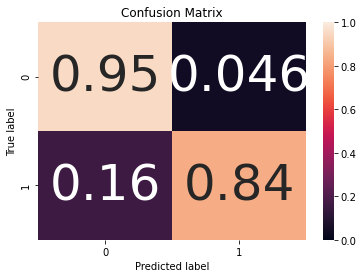

In [39]:
cm = confusion_matrix(Y_test, y_pred_srf)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm,classes=SMOTE_SRF.classes_, title='Confusion Matrix')
plt.show()

Significantly increased the performance of the test accuracy - 87% - 93%

## XGBoost

Uses randomised CV search to find the best parameters from the start - this is because it would require to build multiple models

In [40]:
import xgboost

xgb=xgboost.XGBClassifier()

xgb.fit(X_train_sm, y_train_sm)

y_pred_xgb = xgb.predict(x_test)

#probabilities
pred_proba_xgb = xgb.predict_proba(x_test)


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:53:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
#evaluate model
#on training set
print("The training Accuracy is: ", xgb.score(X_train_sm, y_train_sm))

#test the model on unseen data - higher accuracy than training data?
print("The test Accuracy is: ", xgb.score(x_test, y_test))

#classification report
print(classification_report(y_test, y_pred_xgb))

#roc_auc
print("AUCROC:",roc_auc_score(y_test, pred_proba_xgb[:,1]))

The training Accuracy is:  0.9357456140350877
The test Accuracy is:  0.8566796368352788
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      4349
           1       0.19      0.43      0.26       277

    accuracy                           0.86      4626
   macro avg       0.58      0.66      0.59      4626
weighted avg       0.91      0.86      0.88      4626

AUCROC: 0.8028485738453506


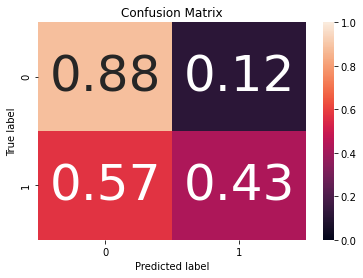

In [42]:
cm = confusion_matrix(y_test, y_pred_xgb)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm,classes=xgb.classes_, title='Confusion Matrix')

Tune Model

In [43]:
classifier=xgboost.XGBClassifier()

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]}

#provides the best possible parameters
clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)

# fitting it
clf.fit(X_train_sm,y_train_sm)

# best parameters
# clf.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[14:53:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.937 total time=   0.5s
[14:53:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.973 total time=   0.5s
[14:53:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.973 total time=   0.5s
[14:53:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.969 total time=   0.5s
[14:53:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.973 total time=   0.5s
[14:53:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.899 total time=   0.2s
[14:53:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.948 total time=   0.2s
[14:53:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.950 total time=   0.2s
[14:53:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.944 total time=   0.2s
[14:53:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.943 total time=   0.2s
[14:53:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=5;, score=0.911 total time=   0.2s
[14:53:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=5;, score=0.953 total time=   0.2s


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:53:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=5;, score=0.955 total time=   0.2s


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:53:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=5;, score=0.950 total time=   0.2s
[14:53:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=5;, score=0.949 total time=   0.2s


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:53:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=2, min_child_weight=7;, score=0.880 total time=   0.1s
[14:53:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=2, min_child_weight=7;, score=0.932 total time=   0.1s
[14:53:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=2, min_child_weight=7;, score=0.933 total time=   0.1s
[14:53:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=2, min_child_weight=7;, score=0.925 total time=   0.1s
[14:53:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=2, min_child_weight=7;, score=0.922 total time=   0.1s
[14:53:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=1;, score=0.920 total time=   0.3s
[14:53:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=1;, score=0.964 total time=   0.3s
[14:53:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=1;, score=0.966 total time=   0.3s
[14:53:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=1;, score=0.962 total time=   0.3s
[14:53:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=1;, score=0.962 total time=   0.3s
[14:53:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [2, 3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [44]:
# best parameters
clf.best_params_

{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.25,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [45]:
#derive model with best parameter
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
xgb_new = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=12,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb_new.fit(X_train_sm, y_train_sm)

y_pred_xgb_new = xgb_new.predict(x_test)

pred_proba_xgb_new = xgb_new.predict_proba(x_test)

[14:53:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [47]:
#evaluate model
#on training set
print("The training Accuracy is: ", xgb_new.score(X_train_sm, y_train_sm))

#test the model on unseen data - higher accuracy than training data?
print("The test Accuracy is: ", xgb_new.score(x_test, y_test))

#classification report
print(classification_report(y_test, y_pred_xgb_new))

#roc_auc
print("AUCROC:",roc_auc_score(y_test, pred_proba_xgb_new[:,1]))

The training Accuracy is:  0.9094298245614035
The test Accuracy is:  0.8428447903156074
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      4349
           1       0.19      0.51      0.28       277

    accuracy                           0.84      4626
   macro avg       0.58      0.69      0.60      4626
weighted avg       0.92      0.84      0.87      4626

AUCROC: 0.8171101203397104


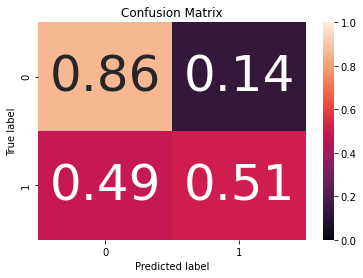

In [48]:
cm = confusion_matrix(y_test, y_pred_xgb_new)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm,classes=xgb_new.classes_, title='Confusion Matrix')

## Plot ROC curves

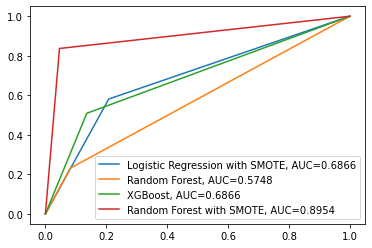

In [49]:
from sklearn import metrics

#logreg
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_new)
auc = round(metrics.roc_auc_score(y_test, y_pred_new), 4)
plt.plot(fpr,tpr,label="Logistic Regression with SMOTE, AUC="+str(auc))

#rf

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_rf_new)
auc = round(metrics.roc_auc_score(y_test, y_pred_rf_new), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))


#xgboost
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_xgb_new)
auc = round(metrics.roc_auc_score(y_test, y_pred_xgb_new), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))


#srf
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_srf)
auc = round(metrics.roc_auc_score(Y_test, y_pred_srf), 4)
plt.plot(fpr,tpr,label="Random Forest with SMOTE, AUC="+str(auc))

plt.legend()

In [50]:
#classification report
print(classification_report(y_test, pred_log))
print(classification_report(y_test, y_pred_new))
print(classification_report(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf_new))
print(classification_report(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb_new))
print(classification_report(Y_test, y_pred_srf))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      4349
           1       0.15      0.58      0.24       277

    accuracy                           0.78      4626
   macro avg       0.56      0.69      0.56      4626
weighted avg       0.92      0.78      0.83      4626

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      4349
           1       0.15      0.58      0.24       277

    accuracy                           0.78      4626
   macro avg       0.56      0.69      0.56      4626
weighted avg       0.92      0.78      0.83      4626

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      4349
           1       0.16      0.24      0.19       277

    accuracy                           0.88      4626
   macro avg       0.56      0.58      0.56      4626
weighted avg       0.90      0.88      0.89      4626

              preci

Feature: 0, Score: -0.02335
Feature: 1, Score: 0.00042
Feature: 2, Score: -0.00532
Feature: 3, Score: -0.29498
Feature: 4, Score: -0.17357
Feature: 5, Score: -3.78504
Feature: 6, Score: -1.39258
Feature: 7, Score: -2.79190
Feature: 8, Score: -1.93592
Feature: 9, Score: -1.22767
Feature: 10, Score: -1.40487
Feature: 11, Score: -2.05541
Feature: 12, Score: -1.21236
Feature: 13, Score: -0.88597
Feature: 14, Score: -0.19204


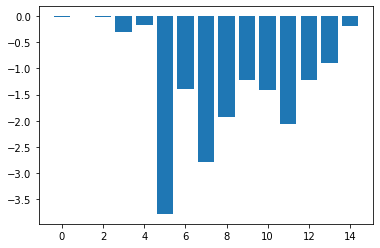

In [51]:
#FEATURE IMPORTANCE
from matplotlib import pyplot

# logistic regression for feature importance
# get importance
importance = logregnew.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Random Forest

In [52]:
import shap
explainer = shap.TreeExplainer(rf_new)
shap_values = explainer.shap_values(x_test)

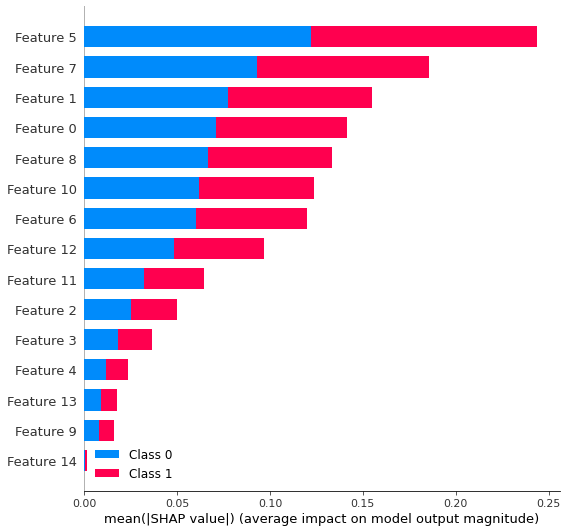

In [53]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

Random Forest with SMOTE

In [54]:
explainer2 = shap.TreeExplainer(SMOTE_SRF)
shap_values2 = explainer2.shap_values(X_test)

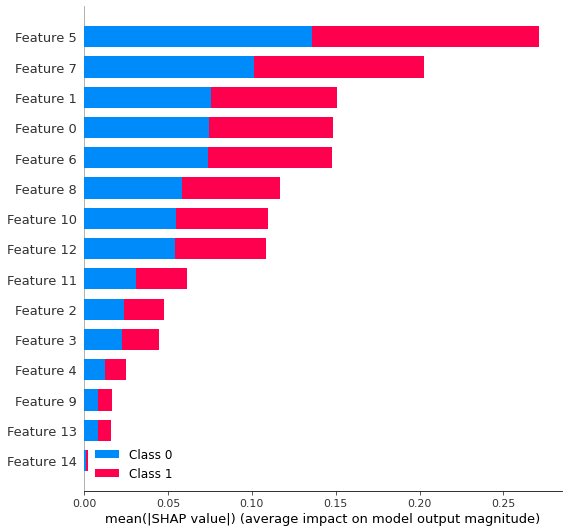

In [55]:
shap.summary_plot(shap_values2, X_test, plot_type="bar")

XGBoost

In [56]:
explainer3 = shap.TreeExplainer(xgb_new)
shap_values3 = explainer3.shap_values(x_test)

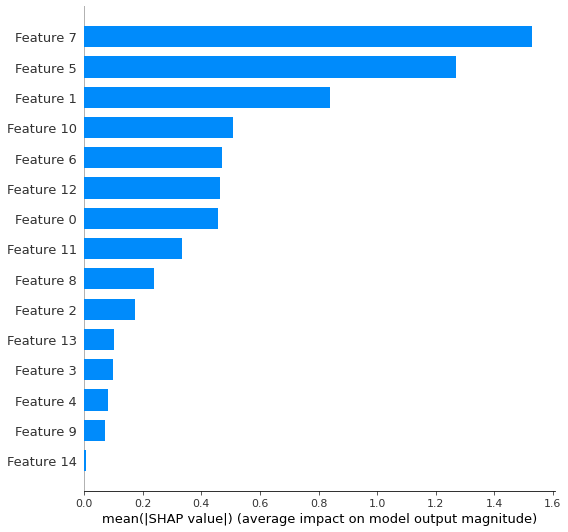

In [57]:
shap.summary_plot(shap_values3, x_test, plot_type="bar")

## Running Final Model on unseen data

https://github.com/Pitsillides91/Python-Tutorials/blob/master/Decision%20Tree%20Tutorials/Decision%20Trees%20-%20Random%20Forest%20-%20XGBoost.ipynb

In [58]:
y_pred_smsrf = SMOTE_SRF.score(x_valid, y_valid)

pred_proba_smsrf = SMOTE_SRF.predict_proba(x_valid)

print("Testing Accuracy:", score)
y_pred_smsrf

Testing Accuracy: 0.7792909641158668


0.9435185185185185

In [59]:
pred_smsrf = SMOTE_SRF.predict(x_valid)

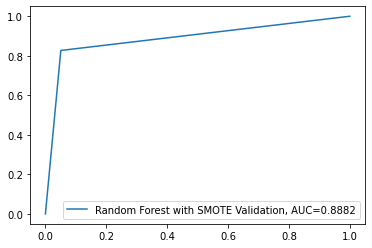

In [65]:
#srf
fpr, tpr, _ = metrics.roc_curve(y_valid, pred_smsrf)
auc = round(metrics.roc_auc_score(y_valid, pred_smsrf), 4)
plt.plot(fpr,tpr,label="Random Forest with SMOTE Validation, AUC="+str(auc))

plt.legend()

In [66]:
print(classification_report(y_valid, pred_smsrf))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1028
           1       0.45      0.83      0.59        52

    accuracy                           0.94      1080
   macro avg       0.72      0.89      0.78      1080
weighted avg       0.96      0.94      0.95      1080



In [60]:
pred_smsrf

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
pred_proba_smsrf

array([[0.96666667, 0.03333333],
       [0.969     , 0.031     ],
       [0.99333333, 0.00666667],
       ...,
       [0.91333333, 0.08666667],
       [0.91944587, 0.08055413],
       [1.        , 0.        ]])

In [62]:
def column(matrix, i):
    return [row[i] for row in matrix]

column(pred_proba_smsrf, 1)

[0.03333333333333333,
 0.031000000000000003,
 0.006666666666666667,
 0.0,
 0.0,
 0.0,
 0.0,
 0.08025396825396826,
 0.0,
 0.6888884078884078,
 0.0,
 0.12,
 0.5518757973479337,
 0.006666666666666667,
 0.0,
 0.03,
 0.029722222222222226,
 0.05333333333333334,
 0.05925925925925926,
 0.06,
 0.023333333333333334,
 0.5814444444444444,
 0.99,
 0.006666666666666667,
 0.10866666666666668,
 0.0,
 0.0,
 0.24666666666666667,
 0.058333333333333334,
 0.02,
 0.0,
 0.0,
 0.6796217801806037,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.16666666666666666,
 0.0,
 0.0,
 0.013333333333333334,
 0.4146666666666667,
 0.8619305509305506,
 0.011666666666666667,
 0.518011669158728,
 0.0,
 0.006666666666666667,
 0.0,
 0.0,
 0.0,
 0.0,
 0.006666666666666667,
 0.010909090909090908,
 0.6342222222222222,
 0.8569341954341947,
 0.6466666666666666,
 0.0,
 0.006666666666666667,
 0.0,
 0.9764,
 0.5477777777777778,
 0.0,
 0.58,
 0.006666666666666667,
 0.8990521375769053,
 0.0,
 0.12666666666666668,
 0.00888888888888888

In [63]:
output = x_valid.copy()
output['Predictions - Fraud or Not'] = pred_smsrf
output['Predictions - Probability to Fraud'] = column(pred_proba_smsrf, 1)
output.head

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# 9.4. Joining the raw data witht the predictions


output = unseen_data.copy()
output['Predictions - Churn or Not'] = pred_xgboost
output['Predictions - Probability to Churn'] = column(pred_prob_xgboost, 1)
output['Predictions - Churn or Not Desc'] = 'Empty'
output['Predictions - Churn or Not Desc'][output['Predictions - Churn or Not'] == 0] = 'Retention'
output['Predictions - Churn or Not Desc'][output['Predictions - Churn or Not'] == 1] = 'Churn'
output.head()